# Kernel Regression

Your introduction to kernel regression provides a clear overview of the method, its applications, and the theoretical framework. Below is a refined version of the text, maintaining the key details and improving clarity.


## Introduction

Kernel regression is a widely employed technique in various fields, including image denoising and reconstruction, telecommunications, and prediction and decision-making in noisy environments. This non-parametric method is used to estimate complex non-linear relationships between explanatory and response variables. Given a set of independent and identically distributed (i.i.d) data points $\{(X_i, Y_i)\}_{i=1}^n$, a regression model is defined as:

$$
Y_i = m(X_i) + \epsilon_i \tag{1}
$$

Here, $\epsilon$ represents a zero-mean error term with variance $\sigma^2$, while $m(\cdot)$ denotes an unknown smooth nonlinear function.

## Problem formulation
The challenge of determining the $m(\cdot)$ function, which effectively models the relationship between data points without making assumptions, has been addressed through various methods. The regression function $m$ is estimated using the conditional expectation of $y$ given $x$:

$$
\hat{m}(x) = \mathbb{E}[y|x] \equiv \int y f(y|x) \, dy = \int \frac{y f(x, y)}{f_X(x)} \, dy \tag{2}
$$

In non-parametric problems, where the joint and marginal density functions are entirely unknown, kernel density estimation (Parzen estimator) is employed to approximate these functions:

$$
\hat{f}_{X,Y}(x, y) = \frac{1}{nh^d} \sum_{i=1}^n K\left(\frac{x - X_i}{h}\right) K\left(\frac{y - Y_i}{h}\right)
$$

$$
\hat{f}_X(x) = \frac{1}{nh^d} \sum_{i=1}^n K\left(\frac{x - X_i}{h}\right)
$$

where $h$ indicates the bandwidth, and $K$ is a kernel function that satisfies:

$$
\int K(x) \, dx = 1, \quad \int x K(x) \, dx = 0, \quad \int x^2 K(x) \, dx \neq 0
$$

The $m(\cdot)$ function is then achieved through a local weighted average, commonly known as the Nadaraya-Watson estimator:

$$
\hat{m}(x) = \mathbb{E}[y|x] \equiv \int y f(y|x) \, dy = \int \frac{y f(x, y)}{f_X(x)} \, dy 
$$

$$
\int \frac{y \frac{1}{nh^d} \sum_{i=1}^n K\left(\frac{x - X_i}{h}\right) K\left(\frac{y - Y_i}{h_1}\right)}{f_X(x)} \, dy
$$

$$
\int \frac{y \frac{1}{nh^d} \sum_{i=1}^n K\left(\frac{x - X_i}{h}\right) K\left(\frac{y - Y_i}{h_1}\right)}{\frac{1}{nh^d} \sum_{i=1}^n K\left(\frac{x - X_i}{h}\right)} \, dy
$$

$$
\frac{\frac{1}{nh^d}\sum_{i=1}^n (K\left(\frac{x - X_i}{h}\right) \int yK\left(\frac{y - Y_i}{h_1}\right)\, dy)}{\frac{1}{nh^d} \sum_{i=1}^n K\left(\frac{x - X_i}{h}\right)}
$$

If $ h_i $ goes to small values we have,

$$
\hat{m}(x) = \frac{\sum_{i=1}^n y_i K_h(x - X_i)}{\sum_{j=1}^n K_h(x - X_j)}
$$

**_Again with more details_**
Non-parametric regression defines the relationship between response $Y$ and explanatory $X$ variables $\{(X_i, Y_i)\}_{i=1}^n$ by an unknown $m(\cdot)$ function as in Eq. (1). Using the expected loss viewpoint in the kernel regression problem leads to the cost function of what actually occurred $y$ and what the model predicted $m(\cdot)$:

$$
V = \mathbb{E}\{L(\text{error})\} = \int L(y - m(x)) f_{Y|X}(x, y) \, dy \tag{5}
$$

where $L$ indicates the loss function. Taking the derivative of Eq. (5) with respect to $m(\cdot)$ gives the best estimator:

$$
\frac{\partial V}{\partial m(x)} = \int \frac{\partial L(y - m(x))}{\partial m(x)} f_{Y|X}(x, y) \, dy
$$

Employing the square loss in Eq. (6) and taking the derivative with respect to $m(\cdot)$ results in the unknown $m(x)$ function as follows:

$$
V = \int (y - m(x))^2 f_{Y|X}(x, y) \, dy
$$

$$
\frac{\partial V_{SL}}{\partial m(x)} = 2 \int -(y - m(x)) f_{Y|X}(x, y) \, dy = 0
$$

$$
\hat{m}(x) = \frac{\int y f_{X,Y}(x, y) \, dy}{f_X(x)} = \frac{\sum_{i=1}^n y_i K_h(x - X_i)}{\sum_{j=1}^n K_h(x - X_j)} 
$$

which is the ordinary Nadaraya-Watson estimator.

Mean Squared Error: 13.536508293401408


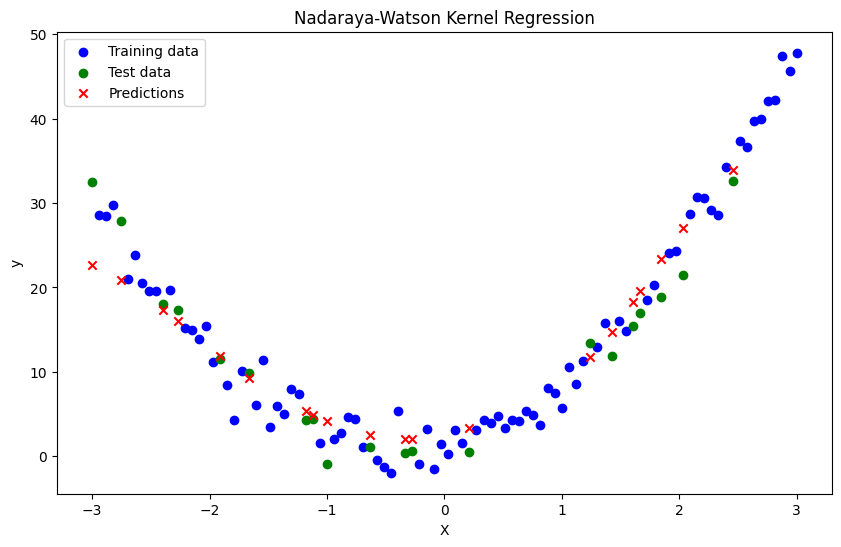

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Kernel function: Gaussian kernel
def gaussian_kernel(x, X, bandwidth):
    return np.exp(-0.5 * ((x - X) / bandwidth) ** 2)

# Nadaraya-Watson estimator
def nadaraya_watson(x, X_train, y_train, bandwidth):
    weights = gaussian_kernel(x, X_train, bandwidth)
    return np.sum(weights * y_train) / np.sum(weights)

# Generate synthetic data
np.random.seed(0)
x = np.linspace(-3, 3, 100)
y = 2 + 3 * x + 4 * x**2 + np.random.normal(0, 2, x.shape)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Apply Nadaraya-Watson estimator
bandwidth = 0.5
y_pred = np.array([nadaraya_watson(xi, X_train, y_train, bandwidth) for xi in X_test])

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, label='Training data', color='blue')
plt.scatter(X_test, y_test, label='Test data', color='green')
plt.scatter(X_test, y_pred, label='Predictions', color='red', marker='x')
plt.title('Nadaraya-Watson Kernel Regression')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()


## Kernel Regression by correntropy loss
Derive the closed form of kernel regression using the Correntropy-Induced Metric (CIM) as follows,


### Define the Correntropy Loss Function

Correntropy is a similarity measure between two random variables that is robust to non-Gaussian noise and outliers. The loss function based on correntropy is:

$$
L_{\text{CIM}}(e) = 1 - \exp\left(-\frac{e^2}{2\sigma^2}\right)
$$

For the kernel regression problem, we consider the expected loss:

$$
V_{\text{CIM}} = \mathbb{E}\left[1 - \exp\left(-\frac{(Y - m(X))^2}{2\sigma^2}\right)\right]
$$

### Write the Expected Loss in Integral Form

Expressing the expected loss in terms of an integral:

$$
V_{\text{CIM}} = \int \left[1 - \exp\left(-\frac{(y - m(x))^2}{2\sigma^2}\right)\right] f_{Y|X}(x, y) \, dy
$$

### Take the Derivative with Respect to $ m(x) $

To find the optimal function $ m(x) $, we need to take the derivative of $ V_{\text{CIM}} $ with respect to $ m(x) $ and set it to zero:

$$
\frac{\partial V_{\text{CIM}}}{\partial m(x)} = \int \frac{\partial}{\partial m(x)} \left[1 - \exp\left(-\frac{(y - m(x))^2}{2\sigma^2}\right)\right] f_{Y|X}(x, y) \, dy = 0
$$

The derivative inside the integral is:

$$
\frac{\partial}{\partial m(x)} \left[1 - \exp\left(-\frac{(y - m(x))^2}{2\sigma^2}\right)\right] = \frac{(y - m(x)) \exp\left(-\frac{(y - m(x))^2}{2\sigma^2}\right)}{\sigma^2}
$$

Thus, the integral becomes:

$$
\int \frac{(y - m(x)) \exp\left(-\frac{(y - m(x))^2}{2\sigma^2}\right)}{\sigma^2} f_{Y|X}(x, y) \, dy = 0
$$

### Simplify the Integral

Rewriting the equation in terms of the joint density function $ f_{X,Y}(x, y) $:

$$
\int (y - m(x)) \exp\left(-\frac{(y - m(x))^2}{2\sigma^2}\right) f_{X,Y}(x, y) \, dy = 0
$$

### Discrete Approximation with Kernel Density

In practice, we approximate the continuous distribution using kernel density estimation. Let $ K_h $ be the kernel function with bandwidth $ h $, and we have a sample $\{(X_i, Y_i)\}_{i=1}^n$. The estimator for $ f_{X,Y}(x, y) $ is:

$$
f_{X,Y}(x, y) \approx \frac{1}{n h} \sum_{i=1}^n K_h(x - X_i) \delta(y - Y_i)
$$

Substituting this into the integral:

$$
\int (y - m(x)) \exp\left(-\frac{(y - m(x))^2}{2\sigma^2}\right) \frac{1}{n h} \sum_{i=1}^n K_h(x - X_i) \delta(y - Y_i) \, dy = 0
$$

#### Evaluate the Integral

The Dirac delta function $ \delta(y - Y_i) $ picks out the value at $ y = Y_i $:

$$
\frac{1}{n h} \sum_{i=1}^n (Y_i - m(x)) \exp\left(-\frac{(Y_i - m(x))^2}{2\sigma^2}\right) K_h(x - X_i) = 0
$$

### Solve for $ m(x) $

To solve for $ m(x) $, we need to isolate $ m(x) $. This involves solving a nonlinear equation. One approach is to use an iterative method such as fixed-point iteration or gradient descent. However, for simplicity, let's rewrite the expression in a more familiar form:

$$
\sum_{i=1}^n (Y_i - m(x)) \exp\left(-\frac{(Y_i - m(x))^2}{2\sigma^2}\right) K_h(x - X_i) = 0
$$

Rearranging terms, we get:

$$
\sum_{i=1}^n Y_i \exp\left(-\frac{(Y_i - m(x))^2}{2\sigma^2}\right) K_h(x - X_i) = m(x) \sum_{i=1}^n \exp\left(-\frac{(Y_i - m(x))^2}{2\sigma^2}\right) K_h(x - X_i)
$$

Thus, the closed form of the estimator $ \hat{m}(x) $ can be written as:

$$
\hat{m}(x) = \frac{\sum_{i=1}^n Y_i \exp\left(-\frac{(Y_i - m(x))^2}{2\sigma^2}\right) K_h(x - X_i)}{\sum_{i=1}^n \exp\left(-\frac{(Y_i - m(x))^2}{2\sigma^2}\right) K_h(x - X_i)}
$$

### Iterative Solution

Since $ m(x) $ appears on both sides of the equation, we solve it iteratively:

. Initialize $ m(x) $ (e.g., using the Nadaraya-Watson estimator).
. Update $ m(x) $ using the equation above until convergence.

**Finally**

The kernel regression estimator with correntropy loss is given by:

$$ \hat{m}(x) = \frac{\sum_{i=1}^n Y_i \exp\left(-\frac{(Y_i - m(x))^2}{2\sigma^2}\right) K_h(x - X_i)}{\sum_{i=1}^n \exp\left(-\frac{(Y_i - m(x))^2}{2\sigma^2}\right) K_h(x - X_i)} $$

This form requires an iterative solution to find $ m(x) $ because it is implicitly defined.

Mean Squared Error: 150.4070291748456


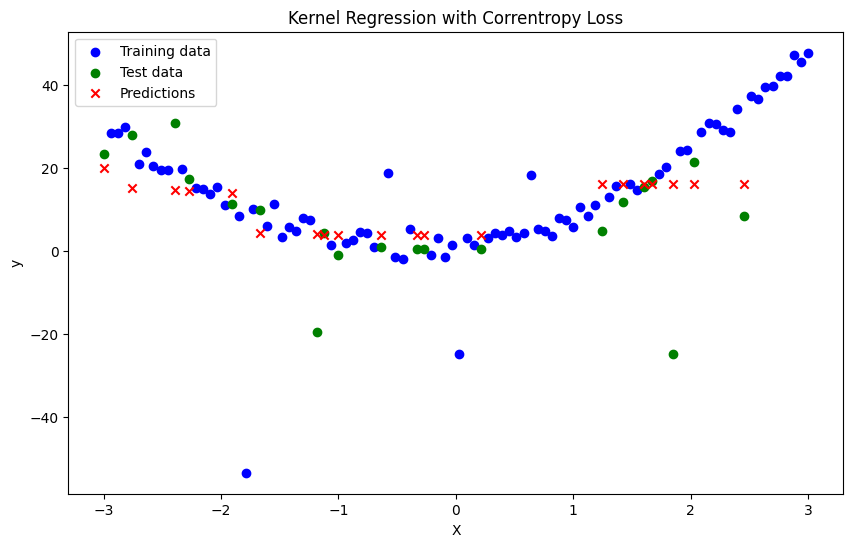

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Kernel functions: Gaussian kernels
def gaussian_kernel(x, X, bandwidth):
    return np.exp(-0.5 * ((x - X) / bandwidth) ** 2)

def gaussian_correntropy(u, sigma):
    return np.exp(-0.5 * (u / sigma) ** 2)

# Correntropy-induced Kernel Regression
def correntropy_kernel_regression(x, X_train, y_train, bandwidth, sigma, tol=1e-5, max_iter=100):
    weights = gaussian_kernel(x, X_train, bandwidth)
    m_x = np.mean(y_train)  # Initialize m(x) with the mean of y_train

    for _ in range(max_iter):
        m_x_new = np.sum(y_train * np.exp(-0.5 * ((y_train - m_x) / sigma) ** 2) * weights) / np.sum(np.exp(-0.5 * ((y_train - m_x) / sigma) ** 2) * weights)
        
        # Check for convergence
        if np.abs(m_x_new - m_x) < tol:
            break
        m_x = m_x_new

    return m_x

# Generate synthetic data
np.random.seed(0)
x = np.linspace(-3, 3, 100)
y = 2 + 3 * x + 4 * x**2 + np.random.normal(0, 2, x.shape)

# Introduce outliers
y[::10] += 120 * (np.random.rand(10) - 0.5)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Apply Correntropy-induced Kernel Regression
bandwidth = 1.1
sigma = 2.2
y_pred = np.array([correntropy_kernel_regression(xi, X_train, y_train, bandwidth, sigma) for xi in X_test])

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, label='Training data', color='blue')
plt.scatter(X_test, y_test, label='Test data', color='green')
plt.scatter(X_test, y_pred, label='Predictions', color='red', marker='x')
plt.title('Kernel Regression with Correntropy Loss')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()


## Homework 1
Correct the above code and write the perfect mathematics and code for log_cosh_loss, quantile_loss, and tukey_loss.

## Weighted Sum of Squared Errors

We used kernel regression idea in local linear regression, instead of fitting a constant function $m(x)$, we fit a linear function $m(x) \approx a + b(x - x_i)$ around each point $x$. The goal is to estimate the parameters $a$ and $b$ by minimizing a weighted sum of squared errors.

The objective function to minimize is:

$$
\sum_{i=1}^n K_h(x - X_i) (Y_i - a - b(X_i - x))^2
$$

where $K_h$ is a kernel function with bandwidth $h$. The Gaussian kernel is commonly used:

$$
K_h(x - X_i) = \exp\left(-\frac{(x - X_i)^2}{2h^2}\right)
$$

### Matrix Formulation

To solve this, we can set up the problem in matrix form. Define:

- $ \mathbf{y} $ as the vector of observed responses.
- $ \mathbf{X} $ as the design matrix of predictors.

For local linear regression, we augment the design matrix to include the linear term:

$$
\mathbf{X}_{\text{augmented}} = \begin{bmatrix}
1 & X_1 - x \\
1 & X_2 - x \\
\vdots & \vdots \\
1 & X_n - x
\end{bmatrix}
$$

Define the weight matrix $ \mathbf{W} $ as a diagonal matrix with the kernel weights:

$$
\mathbf{W} = \text{diag}\left(K_h(x - X_1), K_h(x - X_2), \ldots, K_h(x - X_n)\right)
$$

The parameters $ \mathbf{\theta} $ (which include $ a $ and $ b $) are estimated by minimizing:

$$
(\mathbf{y} - \mathbf{X}_{\text{augmented}} \mathbf{\theta})^T \mathbf{W} (\mathbf{y} - \mathbf{X}_{\text{augmented}} \mathbf{\theta})
$$

### Solution

The solution to the weighted least squares problem is given by:

$$
\mathbf{\theta} = (\mathbf{X}_{\text{augmented}}^T \mathbf{W} \mathbf{X}_{\text{augmented}})^{-1} \mathbf{X}_{\text{augmented}}^T \mathbf{W} \mathbf{y}
$$

This yields the estimates for $ a $ and $ b $.

### Local Linear Estimate

The local linear estimate of $ m(x) $ at a point $ x $ is:

$$
m(x) \approx a
$$

where $ a $ is the first component of $ \mathbf{\theta} $.

Mean Squared Error: 6.924919926410908


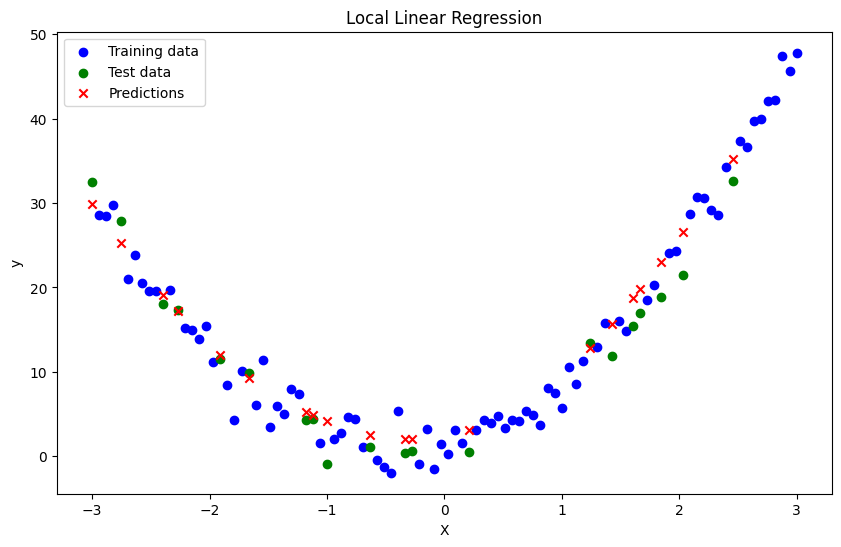

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Kernel function: Gaussian kernel
def gaussian_kernel(x, X, bandwidth):
    return np.exp(-0.5 * ((x - X) / bandwidth) ** 2)

# Local Linear Regression
def local_linear_regression(x, X_train, y_train, bandwidth):
    weights = gaussian_kernel(x, X_train, bandwidth)
    W = np.diag(weights)
    
    X_augmented = np.vstack([np.ones_like(X_train), X_train - x]).T
    theta = np.linalg.inv(X_augmented.T @ W @ X_augmented) @ X_augmented.T @ W @ y_train
    
    return theta[0]

# Generate synthetic data
np.random.seed(0)
x = np.linspace(-3, 3, 100)
y = 2 + 3 * x + 4 * x**2 + np.random.normal(0, 2, x.shape)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Apply Local Linear Regression
bandwidth = 0.5
y_pred = np.array([local_linear_regression(xi, X_train, y_train, bandwidth) for xi in X_test])

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, label='Training data', color='blue')
plt.scatter(X_test, y_test, label='Test data', color='green')
plt.scatter(X_test, y_pred, label='Predictions', color='red', marker='x')
plt.title('Local Linear Regression')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()


## Weighted Sum of Squared Errors with Correntropy Loss

Correntropy is defined as:

$$ V(x) = \sum_{i=1}^n K_\sigma(Y_i - m(X_i)) $$

where $ K_\sigma $ is a kernel function with bandwidth $ \sigma $. For simplicity, we use the Gaussian kernel for $ K_\sigma $:

$$ K_\sigma(u) = \exp\left(-\frac{u^2}{2\sigma^2}\right) $$

### Local Linear Regression with Correntropy Loss

We aim to fit a linear function $ m(x) \approx a + b(x - x_i) $ by minimizing the correntropy loss. The objective function becomes:

$$ V(x) = \sum_{i=1}^n K_h(x - X_i) K_\sigma(Y_i - (a + b(X_i - x))) $$

### Matrix Formulation

To solve this problem, we can set up the objective function and compute the parameters $ a $ and $ b $.

### Derivation

The correntropy-based objective function to minimize is:

$$ V(x) = \sum_{i=1}^n K_h(x - X_i) \exp\left(-\frac{(Y_i - (a + b(X_i - x)))^2}{2\sigma^2}\right) $$


### Mathematical Derivation

The correntropy-based local linear regression objective function is:

$$ V(x) = \sum_{i=1}^n K_h(x - X_i) \exp\left(-\frac{(Y_i - (a + b(X_i - x)))^2}{2\sigma^2}\right) $$

To solve this, we can use gradient descent to optimize the parameters $ a $ and $ b $. The gradients of the objective function with respect to $ a $ and $ b $ are derived as follows:

$$ \frac{\partial V}{\partial a} = -\sum_{i=1}^n K_h(x - X_i) \frac{(Y_i - (a + b(X_i - x)))}{\sigma^2} \exp\left(-\frac{(Y_i - (a + b(X_i - x)))^2}{2\sigma^2}\right) $$

$$ \frac{\partial V}{\partial b} = -\sum_{i=1}^n K_h(x - X_i) \frac{(Y_i - (a + b(X_i - x)))(X_i - x)}{\sigma^2} \exp\left(-\frac{(Y_i - (a + b(X_i - x)))^2}{2\sigma^2}\right) $$

Since the correntropy loss involves an exponential function, the solution cannot be obtained analytically as in the case of the squared error. We need to use numerical optimization techniques such as gradient descent. Using these gradients, we can update $ a $ and $ b $ iteratively using gradient descent.


Mean Squared Error: 205.75919421745843


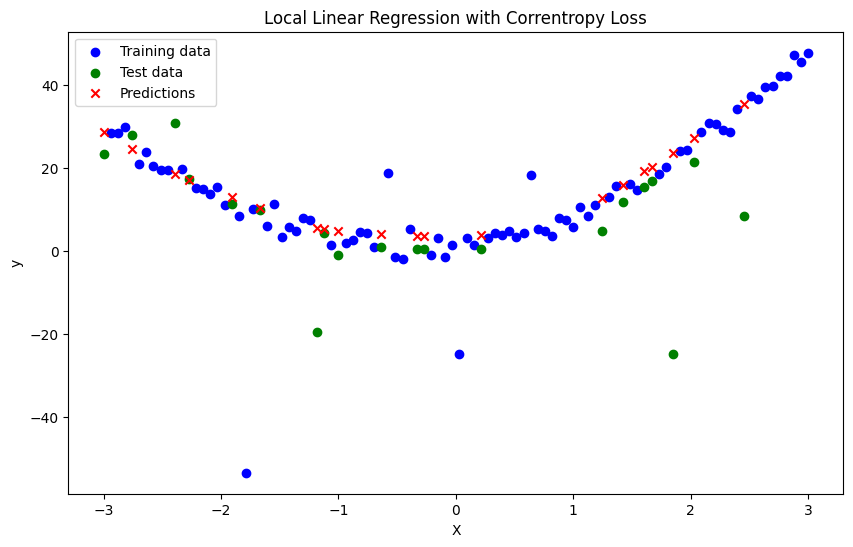

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Kernel functions: Gaussian kernels
def gaussian_kernel(x, X, bandwidth):
    return np.exp(-0.5 * ((x - X) / bandwidth) ** 2)

def gaussian_correntropy(u, sigma):
    return np.exp(-0.5 * (u / sigma) ** 2)

# Local Linear Regression with Correntropy Loss
def correntropy_local_linear_regression(x, X_train, y_train, bandwidth, sigma, learning_rate=0.09, epochs=3000):
    weights = gaussian_kernel(x, X_train, bandwidth)
    
    # Initialize parameters
    a = 0
    b = 0
    
    for _ in range(epochs):
        gradient_a = 0
        gradient_b = 0
        
        for i in range(len(X_train)):
            weight = weights[i]
            prediction = a + b * (X_train[i] - x)
            error = y_train[i] - prediction
            correntropy = gaussian_correntropy(error, sigma)
            
            gradient_a -= weight * correntropy * error / sigma**2
            gradient_b -= weight * correntropy * error * (X_train[i] - x) / sigma**2
        
        a -= learning_rate * gradient_a
        b -= learning_rate * gradient_b
    
    return a + b * (x - x)

# Generate synthetic data
np.random.seed(0)
x = np.linspace(-3, 3, 100)
y = 2 + 3 * x + 4 * x**2 + np.random.normal(0, 2, x.shape)


# Introduce outliers
y[::10] += 120 * (np.random.rand(10) - 0.5)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Apply Local Linear Regression with Correntropy Loss
bandwidth = 1.1
sigma = 2.5
y_pred = np.array([correntropy_local_linear_regression(xi, X_train, y_train, bandwidth, sigma) for xi in X_test])

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, label='Training data', color='blue')
plt.scatter(X_test, y_test, label='Test data', color='green')
plt.scatter(X_test, y_pred, label='Predictions', color='red', marker='x')
plt.title('Local Linear Regression with Correntropy Loss')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()


## Bias-Variance Analysis of Kernel Regression 

The Nadaraya-Watson estimator for kernel regression is defined as:

$$ \hat{m}(x) = \frac{\sum_{i=1}^n K\left(\frac{x - X_i}{h}\right) y_i}{\sum_{i=1}^n K\left(\frac{x - X_i}{h}\right)} $$

To simplify notation, we introduce weights:

$$ w_i = \frac{K\left(\frac{x - X_i}{h}\right)}{\sum_{j=1}^n K\left(\frac{x - X_j}{h}\right)} $$

### Assumptions

- **A0**: For simplicity, assume $ x \in \mathbb{R} $.
- **A1**: There is a true smooth function $ f(x) $ such that:
  $$ y = f(x) + \epsilon $$
  where $ \epsilon $ is independently sampled for each $ x $ from a distribution $ P_\epsilon $ with $ \mathbb{E}[\epsilon] = 0 $ and $ \text{Var}(\epsilon) = \sigma^2 $.
- **A2**: The kernel $ K(z) $ is smooth, $ \int_{\mathbb{R}} K(z)dz = 1 $, $ \int_{\mathbb{R}} zK(z)dz = 0 $, and we denote:
  $$ \sigma_b^2 = \int_{\mathbb{R}} z^2 K(z)dz, \quad \gamma_b^2 = \int_{\mathbb{R}} K^2(z)dz $$

### Expectation of $ \hat{m}(x) $

By expanding $ f $ in a Taylor series around $ x $:

$$ f(X_i) = f(x) + f'(x)(X_i - x) + \frac{1}{2}f''(x)(X_i - x)^2 + o((X_i - x)^2) $$

Given $ y_i = f(X_i) + \epsilon_i $:

$$ \mathbb{E}[\hat{m}(x)] = \mathbb{E}\left[\sum_{i=1}^n w_i y_i\right] = \sum_{i=1}^n w_i f(X_i) + \sum_{i=1}^n w_i \mathbb{E}[\epsilon_i] $$

Since $ \mathbb{E}[\epsilon_i] = 0 $:

$$ \mathbb{E}[\hat{m}(x)] = \sum_{i=1}^n w_i f(X_i) $$

Substituting the Taylor expansion of $ f(X_i) $:

$$ \mathbb{E}[\hat{m}(x)] = f(x) + f'(x)\sum_{i=1}^n w_i (X_i - x) + \frac{1}{2}f''(x)\sum_{i=1}^n w_i (X_i - x)^2 + o(h^2) $$

Using the properties of the kernel $ K $:

$$ \sum_{i=1}^n w_i (X_i - x) \approx 0 $$

Hence,

$$ \mathbb{E}[\hat{m}(x)] = f(x) + \frac{1}{2} f''(x) h^2 \sigma_b^2 $$

The bias is:

$$ \text{Bias}(\hat{m}(x)) = \mathbb{E}[\hat{m}(x)] - f(x) \approx \frac{1}{2} f''(x) h^2 \sigma_b^2 $$

### Variance of $ \hat{m}(x) $

The variance is:

$$ \text{Var}(\hat{m}(x)) = \mathbb{E}\left[\left(\hat{m}(x) - \mathbb{E}[\hat{m}(x)]\right)^2\right] $$

Since $ y_i = f(X_i) + \epsilon_i $:

$$ \text{Var}(\hat{m}(x)) \approx \sum_{i=1}^n w_i^2 \text{Var}(\epsilon_i) = \sigma^2 \sum_{i=1}^n w_i^2 $$

Using the kernel properties:

$$ \text{Var}(\hat{m}(x)) \approx \frac{\sigma^2 \gamma_b^2}{nh} $$

### Mean Squared Error (MSE)

Combining bias and variance:

$$
\text{MSE}(\hat{m}(x)) = \text{Bias}(\hat{m}(x))^2 + \text{Var}(\hat{m}(x))
$$

$$
\text{MSE}(\hat{m}(x)) = \left(\frac{1}{2} f''(x) h^2 \sigma_b^2\right)^2 + \frac{\sigma^2 \gamma_b^2}{nh}
$$

### Optimal Bandwidth

To minimize MSE, take the derivative with respect to $ h $ and set to zero:

$$ \frac{\partial}{\partial h} \left( \left(\frac{1}{2} f''(x) h^2 \sigma_b^2\right)^2 + \frac{\sigma^2 \gamma_b^2}{nh} \right) = 0 $$

$$ 2 \left(\frac{1}{2} f''(x) h^2 \sigma_b^2\right) \cdot f''(x) \sigma_b^2 h - \frac{\sigma^2 \gamma_b^2}{nh^2} = 0 $$

$$ f''(x)^2 \sigma_b^4 h^3 = \frac{\sigma^2 \gamma_b^2}{n} $$

$$ h^3 = \frac{\sigma^2 \gamma_b^2}{n f''(x)^2 \sigma_b^4} $$

$$ h = \left( \frac{\sigma^2 \gamma_b^2}{n f''(x)^2 \sigma_b^4} \right)^{1/3} $$

### Finally

1. **Bias**: $\text{Bias}(\hat{m}(x)) \approx \frac{1}{2} f''(x) h^2 \sigma_b^2$
2. **Variance**: $\text{Var}(\hat{m}(x)) \approx \frac{\sigma^2 \gamma_b^2}{nh}$
3. **MSE**: $\text{MSE}(\hat{m}(x)) \approx \left(\frac{1}{2} f''(x) h^2 \sigma_b^2\right)^2 + \frac{\sigma^2 \gamma_b^2}{nh}$
4. **Optimal Bandwidth**: $h \propto n^{-1/5}$

This analysis shows the trade-off between bias and variance in kernel regression and how the bandwidth parameter $ h $ can be chosen to minimize the mean squared error.

 $$
 \frac{\partial}{\partial h} \left( \left(\frac{1}{2} f''(x) h^2 \sigma_b^2\right)^2 + \frac{\sigma^2 \gamma_b^2}{nh} \right)
 $$

The regularization term involving $ f''(x) $ and its derivative with respect to $ m(x) $ needs careful handling. Let's revisit the derivation with the proper relationship between $ f''(x) $ and $ m(x) $.

### Objective Function

$$ 
V = \int (y - m(x))^2 f_{Y|X}(x, y) \, dy + \lambda \left( \left( \frac{1}{2} f''(x) h^2 \sigma_b^2 \right)^2 + \frac{\sigma^2 \gamma_b^2}{nh} \right)
$$

### Step-by-Step Derivation

**Expected Squared Loss Term**:

   As before, we start with the expected squared loss term:

   $$
   \frac{\partial}{\partial m(x)} \left( \int (y - m(x))^2 f_{Y|X}(x, y) \, dy \right) = -2 \int (y - m(x)) f_{Y|X}(x, y) \, dy
   $$

**Regularization Term**:

   The regularization term involving $ f''(x) $:

   $$
   \lambda \left( \left( \frac{1}{2} f''(x) h^2 \sigma_b^2 \right)^2 \right)
   $$

   The term $ f''(x) $ is the second derivative of the unknown function $ m(x) $, which can be expressed as $ m''(x) $. The derivative of $ (m''(x))^2 $ with respect to $ m(x) $ is computed as:

   $$
   \frac{\partial}{\partial m(x)} \left( (m''(x))^2 \right) = 2 m''(x) \cdot \frac{\partial m''(x)}{\partial m(x)}
   $$

   Since $ \frac{\partial m''(x)}{\partial m(x)} = m'''(x) $:

   $$
   \frac{\partial}{\partial m(x)} \left( (m''(x))^2 \right) = 2 m''(x) \cdot m'''(x)
   $$

**Combining Terms**:

   Combining the derivatives from both the expected squared loss and the regularization term:

   $$
   -2 \int (y - m(x)) f_{Y|X}(x, y) \, dy + \lambda \left( \frac{1}{2} h^2 \sigma_b^2 \right) \cdot 2 m''(x) \cdot m'''(x) = 0
   $$

   Simplifying:

   $$
   \int (y - m(x)) f_{Y|X}(x, y) \, dy = \frac{\lambda}{2} \left( \frac{1}{2} h^2 \sigma_b^2 \right) m''(x) \cdot m'''(x)
   $$

### Solving for $ m(x) $

To solve for $ m(x) $, we need to balance the data fitting term with the regularization term involving the second and third derivatives of $ m(x) $:

$$
\hat{m}(x) = \frac{\int y f_{X,Y}(x, y) \, dy}{f_X(x)} + \frac{\lambda}{2} \left( \frac{1}{2} h^2 \sigma_b^2 \right) m''(x) \cdot m'''(x)
$$


To estimate $ m''(x) $ and $ m'''(x) $, we need to use numerical differentiation. We can approximate the second and third derivatives of the function $ m(x) $ based on the available data points. Let's go through the steps to obtain these derivatives and substitute them into the estimator $ \hat{m}(x) $.

### Step-by-Step Process

**Kernel Density Estimates for $ \hat{m}(x) $**

   The Nadaraya-Watson estimator for $ \hat{m}(x) $ is given by:

$$
\hat{m}(x) = \frac{\sum_{i=1}^n y_i K_h(x - X_i)}{\sum_{j=1}^n K_h(x - X_j)}
$$

**Second Derivative $ m''(x) $**

The second derivative can be estimated using finite differences. For example, a central difference approximation is:

$$
m''(x) \approx \frac{m(x + h) - 2m(x) + m(x - h)}{h^2}
$$

**Third Derivative $ m'''(x) $**

The third derivative can also be approximated using finite differences:

$$
m'''(x) \approx \frac{m(x + 2h) - 2m(x + h) + 2m(x - h) - m(x - 2h)}{2h^3}
$$

**Substituting into the Estimator**

Substitute the estimates of $ m''(x) $ and $ m'''(x) $ into the regularization term:

$$
\hat{m}(x) = \frac{\sum_{i=1}^n y_i K_h(x - X_i)}{\sum_{j=1}^n K_h(x - X_j)} + \frac{\lambda}{2} \left( \frac{1}{2} h^2 \sigma_b^2 \right) m''(x) \cdot m'''(x)
$$

### Detailed Formulation

**Nadaraya-Watson Estimator**:

$$
\hat{m}(x) = \frac{\sum_{i=1}^n y_i K_h(x - X_i)}{\sum_{j=1}^n K_h(x - X_j)}
$$

**Second Derivative Approximation**:

$$
m''(x) \approx \frac{\hat{m}(x + h) - 2\hat{m}(x) + \hat{m}(x - h)}{h^2}
$$

**Third Derivative Approximation**:

$$
m'''(x) \approx \frac{\hat{m}(x + 2h) - 2\hat{m}(x + h) + 2\hat{m}(x - h) - \hat{m}(x - 2h)}{2h^3}
$$

**Final Estimator with Regularization**:

$$
\hat{m}(x) = \frac{\sum_{i=1}^n y_i K_h(x - X_i)}{\sum_{j=1}^n K_h(x - X_j)} + \frac{\lambda}{2} \left( \frac{1}{2} h^2 \sigma_b^2 \right) \left( \frac{\hat{m}(x + h) - 2\hat{m}(x) + \hat{m}(x - h)}{h^2} \right) \cdot \left( \frac{\hat{m}(x + 2h) - 2\hat{m}(x + h) + 2\hat{m}(x - h) - \hat{m}(x - 2h)}{2h^3} \right)
$$

### Simplified Expression

Combining these approximations into a single expression, we have:

$$
\hat{m}(x) = \frac{\sum_{i=1}^n y_i K_h(x - X_i)}{\sum_{j=1}^n K_h(x - X_j)} + \frac{\lambda}{2} \left( \frac{1}{2} h^2 \sigma_b^2 \right) \cdot \left( \frac{\hat{m}(x + h) - 2\hat{m}(x) + \hat{m}(x - h)}{h^2} \right) \cdot \left( \frac{\hat{m}(x + 2h) - 2\hat{m}(x + h) + 2\hat{m}(x - h) - \hat{m}(x - 2h)}{2h^3} \right)
$$

This final form takes into account the kernel density estimates as well as the regularization term that penalizes high curvature.

## Homework 2
In the following code, a regularization term has been added. Correct some issues to improve the fit.

Mean Squared Error: 199.19875538433809


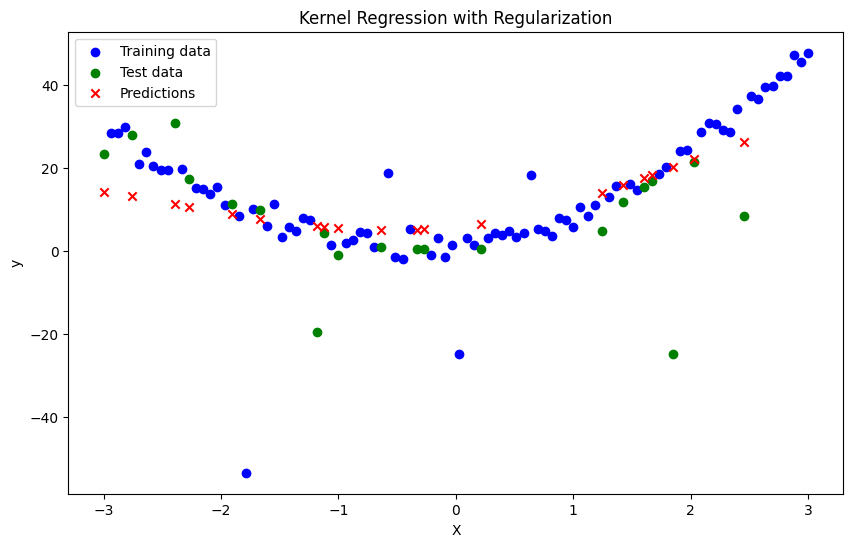

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Gaussian kernel function
def gaussian_kernel(x, X, bandwidth):
    return np.exp(-0.5 * ((x - X) / bandwidth) ** 2)

# Compute the local linear regression estimate
def local_linear_regression(x, X_train, y_train, bandwidth):
    weights = gaussian_kernel(x, X_train, bandwidth)
    weighted_sum = np.sum(weights * y_train)
    normalization = np.sum(weights)
    return weighted_sum / normalization

# Compute second derivative using finite differences
def compute_second_derivative(m, x, h):
    m_x_plus_h = m(x + h)
    m_x_minus_h = m(x - h)
    m_x_plus_2h = m(x + 2*h)
    m_x_minus_2h = m(x - 2*h)
    
    m_prime_prime = (m_x_plus_2h - 2*m_x_plus_h + m_x_minus_2h) / (h ** 2)
    
    return m_prime_prime

# Kernel Regression with Regularization
def kernel_regression_with_regularization(X_train, y_train, X_test, bandwidth, lambda_, sigma_b, h):
    def m_estimator(x):
        return local_linear_regression(x, X_train, y_train, bandwidth)
    
    y_pred = np.zeros_like(X_test)
    
    for i, x in enumerate(X_test):
        m_x = m_estimator(x)
        m_prime_prime = compute_second_derivative(m_estimator, x, h)
        
        # Regularization term
        regularization_term = lambda_ * (0.5 * h ** 2 * sigma_b ** 2) * m_prime_prime
        y_pred[i] = m_x + regularization_term
    
    return y_pred

# Generate synthetic data
np.random.seed(0)
x = np.linspace(-3, 3, 100)
y = 2 + 3 * x + 4 * x**2 + np.random.normal(0, 2, x.shape)

# Introduce outliers
y[::10] += 120 * (np.random.rand(10) - 0.5)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Apply Kernel Regression with Regularization
bandwidth = 1.1
lambda_ = 0.1
sigma_b = 1.0
h = 0.1

y_pred = kernel_regression_with_regularization(X_train, y_train, X_test, bandwidth, lambda_, sigma_b, h)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, label='Training data', color='blue')
plt.scatter(X_test, y_test, label='Test data', color='green')
plt.scatter(X_test, y_pred, label='Predictions', color='red', marker='x')
plt.title('Kernel Regression with Regularization')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()
